# Preparation

## Library installation/import

Install and import libraries that are used in multiple sections of the pipeline.

In [3]:
import pandas as pd

## Configuring Twitter API keys

<font color="red">**IMPORTANT NOTE:** Please note that the API keys below are the course leader's own API keys. You are allowed to use it to do some small tests, but please be careful because all students in the class now have a copy of it, and hence the limits can be easily exceeded.</font>

If your group has decided to use Twitter data, you can [apply for your own keys](https://developer.twitter.com/en/apply-for-access).

In [1]:
import tweepy

#auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
# auth.set_access_token(accessToken, accessTokenSecret)

auth = tweepy.OAuthHandler('BcWEliOxF0h6v9VWpUlNtS5nU', 'HfW6WHnnPqB5BkodYKgMTAihGbmEjioJpP3DhAekLLtVeb6xIi')
auth.set_access_token('841021709209731073-rRR8mlOkIw7pLGEnplp03nWwnYOGwJ3', 'Aa2c8dlmUOKzsRRRc0v6gELtKbJFAkcNwNzOe9T6uuCUQ')

api = tweepy.API(auth, wait_on_rate_limit=True)

## Downloading of new data set

<font color="red">**IMPORTANT NOTE:** Please do not run the cell below unless intending to download a new data set. If you just want to see what the rest of the code in this notebook produces, you can skip this cell and proceed to the next one (under Data pre-processing/Cleaning), which will read data from the `current_set.csv` file that has been provided to you.</font>

Should you decide to run this cell, you can explore by changing the parameters.

Also, check the [Tweepy API reference](https://docs.tweepy.org/en/latest/api.html) to find out about other ways through which you can retrieve tweets, e.g., by specifying usernames.

**WARNING:** It is likely that the retrieved tweets, which will be displayed in succeeding cells, contain strong language that some might find offensive or disturbing.

In [7]:
# Display the dataset
df = pd.read_csv("current_set_2.csv")
df

,date,user,location,text
0,2023-03-06 11:49:43+00:00,shAdes_VK,"Abuja, Nigeria",@privilege_mufc That's Y we need #QatarIn asa...
1,2023-03-06 11:49:04+00:00,GGMANUTD23,Da qualche parte,Good Morning Reds ♥️\n\n#mufc #GlazersOut #Qat...
2,2023-03-06 11:47:11+00:00,patrickmcdona10,Scotland,@iqqumufc This.\nThe Glazers have emptied the ...
3,2023-03-06 11:46:39+00:00,biakmuan,NaN,@amysmalls_ You did it right...\nwe should do ...
4,2023-03-06 11:35:57+00:00,Glazersmustsell,NaN,@Glazerspissoff Shaw has been immense this sea...
...,...,...,...,...
1495,2023-03-02 07:17:44+00:00,Bobbyfagan1985,The bat cave,It’s been 6 months since Manchester United pro...
1496,2023-03-02 06:55:36+00:00,mijiofficiall,Nigeria,Hey #MUFC 👋👋🏾\nToday's another day to let you ...
1497,2023-03-02 04:53:31+00:00,GeorgeW31234015,"Nairobi, Kenya",@UTDMist Let go United family like i follow yo...
1498,2023-03-02 04:23:23+00:00,gaylecasey101,sherman oaks,Why would I put stock into anything a bummy du...


# Data pre-processing

## Cleaning

Below we provide some code for text cleaning. However, we encourage you to think of other ways to clean your data, e.g., by removing hashtags, removing usernames, removing duplicate tweets?

In [29]:
# Load the regular expression library
import re

# Make sure that line below is uncommented, if you are loading data from a provided/previously saved CSV
tweets_df = pd.read_csv('current_set_2.csv', quotechar='"', encoding='utf8')


# Remove punctuation
tweets_df['text_processed'] = tweets_df['text'].map(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove unnecessary line breaks
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r"\n", '', x))

# Convert the titles to lowercase
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: x.lower())

# Remove whitespace
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s{2,}', ' ', x))

# Remove hashtags, mentions, and usernames
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B#\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\B@\w+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^@\w+\s', '', x))

# Remove links
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'http\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https\S+\s\s\S\s\S+\s\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'https+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'tco+', '', x))

# Remove vague letters
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[s]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'\s[t]\s', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'co\/\S+', '', x))
tweets_df['text_processed'] = tweets_df['text_processed'].map(lambda x: re.sub(r'^t\s', '', x))


# Print out the first rows 
#print(tweets_df['text_processed'].head()

# Removing duplicate tweets
unique_tweets = list(set(list(tweets_df['text_processed'].values)))
unique_tweets = [t for t in unique_tweets if t]

print(unique_tweets)
#tweets_df


[' there are obvious reasons for harry kane attraction from mufc but my understanding is that ideally united would like a younger dynamic profile there as like victor osimhen melissareddy_', 'take a deep guess whos office desk this is yes youre bl00d7 rightits my desk jokes im calling hrdecided to show up in the office today and this was waiting for me post livmun game thanks to you guys manutd mufc yk7rpomtwp', 'no more hunger gamesmarcusrashfordcookerybon appetite edition 2020a footie classic about a game changer who changed minds and gave the government more than food for thought when it came to school meals mufc manunited d4itzh2f3a', 'bruno is one of the best player this sznall this hate cause neville the glazers lap dog liedbut no word said about a gk that let 7 goals in from 8 shotmufc', 'mufc ranks 8th in terms of conversion rate in the premier league timessport s3lo6vijno', 'he was a dry player anyway but touching the this is anfield signgoodbye and good riddance mufc zgznmjs5

## Exploration using a word cloud

Generating a word cloud is one way by which you can check whether your data needs any further cleaning.

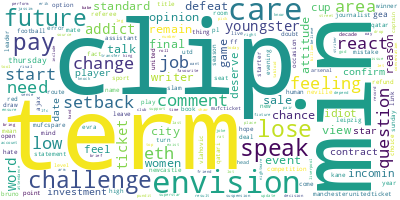

In [31]:
from wordcloud import WordCloud

# join the words of the different tweets together into one string
long_string = ' '.join(unique_tweets)
new_long_string = ' '.join(set(long_string.split(" ")))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(new_long_string)

# visualize the word cloud
wordcloud.to_image()

# Named Entity Recognition


This implementation is based on [spaCy's model](https://spacy.io/models/en#en_core_web_trf) using contextualised embeddings.

In [32]:
#!pip install spacy-transformers
#!python -m spacy download en_core_web_trf
import spacy
from spacy import displacy
import en_core_web_trf

nlp = spacy.load('en_core_web_trf')


In [64]:
df2 = pd.DataFrame(columns=['Label', 'Text'])
labels = []
texts = []

for tweet_text in unique_tweets:
  doc = nlp(tweet_text)
  print(tweet_text)
  for ne in doc.ents:
    print('\tNE found: ', ne.start_char, ne.end_char, ne.label_, tweet_text[ne.start_char:ne.end_char])
    labels.append(ne.label_)
    texts.append(tweet_text[ne.start_char:ne.end_char])

Streaming output truncated to the last 5000 lines.
 manchester united believe they will land harry kane this summer if tottenham finish outside top 4 mufcncustisthesun
	NE found:  1 18 ORG manchester united
	NE found:  42 52 PERSON harry kane
	NE found:  53 64 DATE this summer
	NE found:  68 77 GPE tottenham
	NE found:  97 98 CARDINAL 4
	NE found:  99 116 ORG mufcncustisthesun
ten hags wife honey wake up its 8ten hag what liverpool scored againliverpoolvsmanunited livmnu mufc sqrbq23cme
	NE found:  0 8 PERSON ten hags
	NE found:  32 36 DATE 8ten
	NE found:  46 55 ORG liverpool
	NE found:  63 88 ORG againliverpoolvsmanunited
manutdmen casemiro is our captain mufc
	NE found:  10 18 PERSON casemiro
	NE found:  34 38 PERSON mufc
i can only think that cristiano could have helpedsaha claims united would have avoided liverpool thrashing if they still had ronaldo mufc ytc7d9ikx8
	NE found:  22 31 PERSON cristiano
	NE found:  43 53 PERSON helpedsaha
	NE found:  61 67 ORG united
	NE found:  87 9

In [67]:
df2['Label'] = labels
df2['Text'] = texts
df2

,Label,Text
0,PERSON,harry kane
1,ORG,mufc
2,ORG,united
3,PERSON,osimhen melissareddy
4,DATE,today
...,...,...
5204,GPE,gilletteuk
5205,ORG,betis
5206,ORG,mufc
5207,ORG,manutd


In [69]:
df2.Label.unique()

array(['PERSON', 'ORG', 'DATE', 'CARDINAL', 'ORDINAL', 'FAC', 'GPE',
       'LOC', 'NORP', 'TIME', 'EVENT', 'WORK_OF_ART', 'MONEY', 'PRODUCT',
       'QUANTITY', 'LANGUAGE'], dtype=object)

In [141]:
labelarray = df2.Label.unique()
i=0
frames = {}

for i in range(len(labelarray)):
  frames["df{0}".format(labelarray[i])] = pd.DataFrame(columns=['Text'])

for j in range(len(df2)):
  dfname = "df" + df2.Label[j]
  frames[dfname] = frames[dfname].append({'Text': df2.Text[j]}, ignore_index=True)

for i in range(len(labelarray)):
  frames["df{0}".format(labelarray[i])] = frames["df{0}".format(labelarray[i])].groupby(['Text'])['Text'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)


In [154]:
frames['dfGPE']

,Text,Count
47,liverpool,91
86,southampton,11
78,qatar,9
62,manchester,9
29,england,8
...,...,...
33,fernandes,1
32,faro,1
30,englands,1
27,detroit,1


In [36]:
html = displacy.render(doc, style='ent', page=True)
f = open('test1.html', 'w')
f.write(html)
f.close()

In [41]:
doc

uploading this with the hope of opening a conversation me or anybody coz there is this perception that online fans want coz of success amp money thats untrue amp largely undervaluing us talk to real people pls gnev2 lauriewhitwell ankaman616 wearetheoverlap mufc pdyvjfvuj8

# Named Entity Linking

This implementation is based on [spaCy Entity Linker](https://github.com/egerber/spacy-entity-linker).

In [28]:
!pip install spacy-entity-linker
!python -m spacy download en_core_web_md

import en_core_web_md
from spacy.language import Language

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for spacy-entity-linker: filename=spacy_entity_linker-1.0.3-py3-none-any.whl size=14393 sha256=1b59b1e1c99c91d406cebb3424b5f1f153769f542f3dcebf2dd4e88abe961c00
  Stored in directory: /root/.cache/pip/wheels/5a/1e/a2/8f41d20064ce0537b82d9f4ea77a4fc2ce540cb3e182f5f454
Successfully built spacy-entity-linker
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-05 13:35:30.505626: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-05 13:35:30.505700: W tensorflow/compiler/xla/stream_executor/platform/default/dso_l

In [29]:
from spacy_entity_linker import EntityLinker
!python -m spacy_entity_linker "download_knowledge_base"

nlp = spacy.load("en_core_web_md")

#add to pipeline
nlp.add_pipe('entityLinker', last=True)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-05 13:35:50.127539: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-05 13:35:50.127676: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-05 13:35:50.127704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [30]:
for tweet_text in unique_tweets:
  try:
    doc = nlp(tweet_text)
    print(tweet_text)
    all_linked_entities = doc._.linkedEntities
    for linked_entity in all_linked_entities:
      print(linked_entity.get_url() + ' ' + linked_entity.pretty_string(True))
  except:
    pass


adele sparks engagement rumours after she wears huge diamond… https://t co/alqdxg4mcj #influencers #adele #birthday… https://t co/7tfev6igim
https://www.wikidata.org/wiki/Q157512 engagement  => engagement <promise to wed; period of preparation before marriage>
https://www.wikidata.org/wiki/Q23215 adele  => Adele <British singer-songwriter>
https://www.wikidata.org/wiki/Q878352 rumours  => rumor <unverified account or explanation>
https://www.wikidata.org/wiki/Q5283 diamond  => diamond <allotrope of carbon>
https://www.wikidata.org/wiki/Q33111 co  => Corsican <Italo-Dalmatian language spoken in Corsica and part of Sardinia>
https://www.wikidata.org/wiki/Q2906862 influencers  => influencer <influential person who uses his/her strong presence and activity in social media and networks to influence particular audiences in their buying decisions (influencer marketing)>
https://www.wikidata.org/wiki/Q278485 #  => hashtag <word or an unspaced phrase prefixed with the number sign, used to categ